# LSTM for fNIRS data analysis for Human Activity Recognition (HAR)

In [1]:
% ls ../../../datasets/fNIRs_data_10subjects/

all-fNIRs-data.zip  P13-4-17-2018/  P16-4-18-2018/  P19-4-19-2018/
P11-4-17-2018/      P14-4-18-2018/  P17-4-18-2018/  P20-4-19-2018/
P12-4-17-2018/      P15-4-18-2018/  P18-4-19-2018/


In [2]:
% ls ../../../datasets/fNIRs_data_10subjects/P12-4-17-2018/

1. Right Hand/  2. Both Hands/  3. Left Hand/  4. Right Leg/  5. Left Leg/


In [3]:
% ls ../../../datasets/fNIRs_data_10subjects/P12-4-17-2018/1.\ Right\ Hand

2018-04-17_006/
fNIR_data.txt
head20180417-145130.txt
NIRS-2018-04-17_006_deoxyhb_T141to2511_C1to20.txt
NIRS-2018-04-17_006_oxyhb_T141to2511_C1to20.txt
Processed/
r_hand20180417-145128.txt
r_lower_arm20180417-145129.txt
r_upper_arm20180417-145129.txt


In [4]:
import numpy as np
import os
import pandas as pd

# % find ../../datasets/fNIRs_data/ | grep fNIR_data # NOT WORKING!!
def find_all(name, path):
    result = []
    for root, dirs, files in os.walk(path):
        if name in files:
            result.append(os.path.join(root, name))
    return result

allpaths = find_all(name='fNIR_data.txt', path='/home/arasdar/datasets/fNIRs_data_10subjects/')
allpaths = sorted(allpaths, reverse=False)
# print(allpaths, len(allpaths))
allpaths, len(allpaths)

(['/home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/1. Right Hand/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/2. Both Hands/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/3. Left hand/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/5. Left Leg/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/1. Right Hand/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/2. Both Hands/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/3. Left Hand/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/4. Right Leg/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/5. Left Leg/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P13-4-17-2018/1. Right Hand/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P13-4-17-2018/2. Both Hands/fNIR_data.t

In [5]:
# df: data frame object
df = []
for each_idx in range(len(allpaths)):
    file = pd.read_csv(filepath_or_buffer=allpaths[each_idx], names=['time', 'sample', 
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel'],
                         header=None)
    df.append(file)
    
for each in range(len(df)):
    print(df[each].shape, allpaths[each])
    df[each]=df[each].drop(axis=1, columns=None, index=None, labels=['time', 'sample'])
    df[each] = df[each].dropna()
    df[each]['channel.39'] = df[each]['channel.39'].astype(str).str[1:-1].astype(float)
print(len(df))

/home/arasdar/anaconda3/envs/arasdar-DL-env/lib/python3.6/site-packages/pandas/io/parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


(2388, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/1. Right Hand/fNIR_data.txt
(1244, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/2. Both Hands/fNIR_data.txt
(2389, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/3. Left hand/fNIR_data.txt
(1201, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/5. Left Leg/fNIR_data.txt
(2372, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/1. Right Hand/fNIR_data.txt
(1210, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/2. Both Hands/fNIR_data.txt
(2378, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/3. Left Hand/fNIR_data.txt
(1202, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/4. Right Leg/fNIR_data.txt
(1222, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/5. Left Leg/fNIR_data.txt
(2405, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P13-4-17-2018/1. Right Hand/fNIR_data.txt
(1196, 42) /home/arasdar/da

In [6]:
data, labels = [], []
for each in range(0, len(df), 1):
    dfmat = df[each].as_matrix()
    label = allpaths[each][59:60]
    print(dfmat.dtype, dfmat.shape, label, allpaths[each])
    data.append(dfmat)
    labels.append(label)
len(data), len(labels)

float64 (2387, 40) 1 /home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/1. Right Hand/fNIR_data.txt
float64 (1243, 40) 2 /home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/2. Both Hands/fNIR_data.txt
float64 (2388, 40) 3 /home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/3. Left hand/fNIR_data.txt
float64 (1200, 40) 5 /home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/5. Left Leg/fNIR_data.txt
float64 (2371, 40) 1 /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/1. Right Hand/fNIR_data.txt
float64 (1209, 40) 2 /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/2. Both Hands/fNIR_data.txt
float64 (2377, 40) 3 /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/3. Left Hand/fNIR_data.txt
float64 (1201, 40) 4 /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/4. Right Leg/fNIR_data.txt
float64 (1221, 40) 5 /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/5. Left Leg/fNIR_data.txt
float64 (2404, 40) 1 /home/arasdar/

(48, 48)

In [7]:
# This is very much like a convolution for extracting the windows
# size/width, stride/overlap, padding, dilation, num filters/out channel
def minibatching(X, Y, stride, width):
    Xmb, Ymb = [], []
    print(len(X), len(Y))
    # 1st and 1st
    for eachX in range(len(X)):
        num_mb = ((X[eachX].shape[0]-width)//stride)+1
        for each in range(num_mb):
            # The max is (num_mb-1)*stride+width==X[idx].shape[0]
            # The last each is (num_mb-1)
            # each = ((each-1)*stride)+width
            each *= stride
            Xmb.append(X[eachX][each:each+width])
            # There is only one label for one image signal or signal window or temporal window
            #Ymb.append(Y[eachX][each:each+1])
            Ymb.append(Y[eachX])
    return Xmb, Ymb

In [8]:
# Width is based on the sampling rate which is roughly about 233 points per window
# for 10sec rest and 20 sec activity
width = 250
Xmb, Ymb = minibatching(X=data, Y=labels, stride=1, width=width)
# for eachX, eachY in zip(Xmb, Ymb):
#     print(eachX.shape, eachY)
print(len(Xmb), len(Ymb))
print(Xmb[0].shape, Xmb[0].dtype)
print(Ymb[0])

48 48
69615 69615
(250, 40) float64
1


In [9]:
# Conversion from python list to numpy array
X, Y=np.array(object=Xmb, dtype=float), np.array(object=Ymb, dtype=int)
print(X.shape, X.dtype, Y.shape, Y.dtype)

(69615, 250, 40) float64 (69615,) int64


In [10]:
# Now I should devide the data into train and test
# Train and valid split
from sklearn.model_selection import train_test_split

# 30% of the training data/ entire training data is assigned to validation.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.30)
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)
print(Xtrain.dtype, Xtest.dtype, Ytrain.dtype, Ytest.dtype)

(48730, 250, 40) (20885, 250, 40) (48730,) (20885,)
float64 float64 int64 int64


In [11]:
# # standardizing/normalizing the train and test data
# def standardize(train, test):
# """ Standardize data """
# # Standardize train and test
# X_train = (train - np.mean(train, axis=0)[None,:,:]) / np.std(train, axis=0)[None,:,:]
# X_test = (test - np.mean(test, axis=0)[None,:,:]) / np.std(test, axis=0)[None,:,:]
# return X_train, X_test

Xtrain = (Xtrain - Xtrain.mean(axis=0))/ Xtrain.std(axis=0)
Xtest = (Xtest - Xtest.mean(axis=0))/ Xtest.std(axis=0)
print(Xtrain.shape, Xtrain.dtype)
print(Xtest.shape, Xtest.dtype)

(48730, 250, 40) float64
(20885, 250, 40) float64


In [12]:
print(Xtrain.mean(axis=0), Xtrain.std(axis=0))

[[-7.13112675e-17  5.39140522e-17  4.88721406e-17 ...  2.46251705e-17
  -1.31474739e-16  6.84998265e-17]
 [ 6.04528170e-17  3.02696965e-17 -5.52457275e-17 ...  3.49322687e-17
  -6.49137583e-17 -7.97410340e-18]
 [ 1.94750388e-17  1.07901011e-17  4.81237140e-17 ...  7.07058053e-17
  -2.28492237e-17 -8.80568847e-18]
 ...
 [ 5.12620933e-17 -1.94021327e-17  7.34073176e-18 ...  2.59756418e-17
  -6.39933189e-17  4.66598965e-18]
 [-3.72140014e-17 -2.09559437e-17  2.73739578e-17 ...  1.60507310e-17
   6.31959086e-17 -7.52071866e-18]
 [ 4.73433910e-17  6.35057595e-17 -3.29330470e-17 ...  7.57847395e-17
   1.14198274e-16  7.55739954e-17]] [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [13]:
print(Xtest.mean(axis=0), Xtest.std(axis=0))

[[-6.03778459e-17 -4.46215565e-17  4.83373616e-17 ... -3.30648179e-18
   1.45554305e-16  5.11109257e-17]
 [-7.33698740e-17  1.84354965e-17 -1.26890226e-17 ... -7.33034254e-17
   5.55775998e-17 -1.08590284e-17]
 [ 4.03794785e-17 -3.94545142e-17 -7.09670930e-18 ...  2.19366727e-17
   6.70173889e-17  2.94699492e-17]
 ...
 [ 3.33412440e-17 -5.79431696e-17  2.87456596e-17 ... -1.79291583e-17
   1.26688222e-16  4.87732643e-17]
 [-7.29764984e-17  5.26272825e-17  9.29748657e-17 ...  4.84676008e-18
   1.02936838e-16 -6.55568489e-17]
 [-1.59157660e-17 -2.18084269e-17  6.58904208e-18 ... -5.16930153e-17
   8.14872336e-17  5.73544351e-17]] [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [14]:
# Onehotencoding of the output labels
def onehot(labels, n_class):
	""" One-hot encoding """
	expansion = np.eye(n_class)
	y = expansion[:, labels-1].T
	assert y.shape[1] == n_class, "Wrong number of labels!"

	return y

print(Y.max(axis=0), Ytrain.max(axis=0), Ytest.max(axis=0))
# # assert Y.max(axis=0) == Ytrain.max(axis=0) == Ytest.max(axis=0), 'wrong labels'
Ytrain=onehot(labels=Ytrain, n_class=Ytrain.max(axis=0))
Ytest=onehot(labels=Ytest, n_class=Ytest.max(axis=0))
print(Ytrain.shape, Ytrain.dtype, Ytest.shape, Ytest.dtype)

5 5 5
(48730, 5) float64 (20885, 5) float64


In [15]:
# Now separating train and validation set
# 30% of the training data/ entire training data is assigned to validation.
Xtrain, Xvalid, Ytrain, Yvalid = train_test_split(Xtrain, Ytrain, test_size=0.30)
print(Xtrain.shape, Xvalid.shape, Xtest.shape, Xtrain.dtype, Xvalid.dtype, Xtest.dtype)
print(Ytrain.shape, Yvalid.shape, Ytest.shape, Ytrain.dtype, Yvalid.dtype, Ytest.dtype)

(34111, 250, 40) (14619, 250, 40) (20885, 250, 40) float64 float64 float64
(34111, 5) (14619, 5) (20885, 5) float64 float64 float64


In [16]:
# In this one we should define and detect GPUs for tensorflow
# GPUs or CPU
import tensorflow as tf

# Check TensorFlow Version
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.7.0
Default GPU Device: /device:GPU:0


In [17]:
# now I can design the actual input and output tensors
N, W, Cin = Xvalid.shape[0], Xvalid.shape[1], Xvalid.shape[2]
Xinput = tf.placeholder(dtype=tf.float32, name=None, shape=[N, W, Cin])
print(Xinput.shape, Xinput.dtype, Xtrain.shape, Xtrain.dtype, Xvalid.shape, Xvalid.dtype, Xtest.shape, Xtest.dtype)

(14619, 250, 40) <dtype: 'float32'> (34111, 250, 40) float64 (14619, 250, 40) float64 (20885, 250, 40) float64


In [18]:
# This is the output tensor for labels
N, Cout = Yvalid.shape[0], Yvalid.shape[1]
Ylabels = tf.placeholder(dtype=tf.float32, name=None, shape=[N, Cout])
print(Ylabels.shape, Ylabels.dtype, Ytrain.shape, Ytrain.dtype, Yvalid.shape, Yvalid.dtype, Ytest.shape, Ytest.dtype)

(14619, 5) <dtype: 'float32'> (34111, 5) float64 (14619, 5) float64 (20885, 5) float64


In [19]:
# Xinput NxWxCin => WxNxCin == (seq_len, N, n_channels)
print(Xinput.shape, Xinput.dtype)

# inputs = tf.transpose(a=Xinput, perm=[1,0,2]) # reshape into (seq_len, N, channels)
inputs = tf.transpose(Xinput, [1,0,2]) # reshape into (seq_len, N, channels)
print(inputs.shape, inputs.dtype)

# shape=[-1, Cin]
shape = [inputs.shape[0].value * inputs.shape[1].value, inputs.shape[2].value]
inputs = tf.reshape(tensor=inputs, shape=shape) # (W*N, Cin)
print(inputs.shape, inputs.dtype)

# Open up the tensor into a list of seq_len pieces
inputs = tf.split(value=inputs, num_or_size_splits=W, axis=0)
print(len(inputs), inputs[0].shape, inputs[0].dtype)

(14619, 250, 40) <dtype: 'float32'>
(250, 14619, 40) <dtype: 'float32'>
(3654750, 40) <dtype: 'float32'>
250 (14619, 40) <dtype: 'float32'>


In [20]:
# RNN-LSTM parameters
lstm_size = 3 * Cin # 3 times the amount of channels
print(lstm_size)

# Add LSTM layers
# lstm = tf.contrib.rnn.BasicLSTMCell(lstm_size)
lstm = tf.nn.rnn_cell.BasicLSTMCell(num_units=lstm_size)
print(lstm)

120


In [21]:
# drop = tf.nn.rnn_cell.DropoutWrapper(lstm, output_keep_prob=keep_prob_)
lstm_layers = 1 # Number of layers
cell = tf.nn.rnn_cell.MultiRNNCell(cells=[lstm] * lstm_layers)

In [22]:
initial_state = cell.zero_state(batch_size=N, dtype=tf.float32)

In [23]:
outputs, final_state = tf.nn.static_rnn(cell=cell, inputs=inputs, dtype=tf.float32, initial_state=initial_state)
print(len(outputs), outputs[0].shape, outputs[0].dtype)

250 (14619, 120) <dtype: 'float32'>


In [24]:
# We only need the last output tensor to pass into a classifier
Ylogits = tf.layers.dense(inputs=outputs[-1], units=Cout, name=None)
print(Ylogits.shape, Ylogits.dtype)
print(len(outputs), outputs[-1].shape, outputs[-1].dtype)

(14619, 5) <dtype: 'float32'>
250 (14619, 120) <dtype: 'float32'>


In [25]:
# Backward pass: error backpropagation
# Cost function
loss = tf.nn.softmax_cross_entropy_with_logits_v2(logits=Ylogits, labels=Ylabels)
print(loss)
loss = tf.reduce_mean(input_tensor=loss)
print(loss)

Tensor("softmax_cross_entropy_with_logits/Reshape_2:0", shape=(14619,), dtype=float32)
Tensor("Mean:0", shape=(), dtype=float32)


In [26]:
# Optimizer
optimizer = tf.train.AdamOptimizer().minimize(loss=loss)
print('optimizer', optimizer)

optimizer name: "Adam"
op: "NoOp"
input: "^Adam/update_rnn/multi_rnn_cell/cell_0/basic_lstm_cell/kernel/ApplyAdam"
input: "^Adam/update_rnn/multi_rnn_cell/cell_0/basic_lstm_cell/bias/ApplyAdam"
input: "^Adam/update_dense/kernel/ApplyAdam"
input: "^Adam/update_dense/bias/ApplyAdam"
input: "^Adam/Assign"
input: "^Adam/Assign_1"



In [27]:
# Accuracy
Ylogits_argmax = tf.argmax(input=Ylogits, axis=1)
print(Ylogits_argmax)
Ylabels_argmax = tf.argmax(input=Ylabels, axis=1)
print(Ylabels_argmax)
accuracy = tf.equal(x=Ylogits_argmax, y=Ylabels_argmax, name=None)
print(accuracy)
accuracy = tf.cast(x=accuracy, dtype=tf.float32)
print(accuracy)
accuracy = tf.reduce_mean(input_tensor=accuracy, name=None)
print(accuracy)

Tensor("ArgMax:0", shape=(14619,), dtype=int64)
Tensor("ArgMax_1:0", shape=(14619,), dtype=int64)
Tensor("Equal:0", shape=(14619,), dtype=bool)
Tensor("Cast:0", shape=(14619,), dtype=float32)
Tensor("Mean_1:0", shape=(), dtype=float32)


In [28]:
# # Confusion matrix
# confusion_matrix = tf.confusion_matrix(predictions=tf.argmax(logits, 1),
#                                        labels=tf.argmax(labels_, 1))
# print('confusion_matrix', confusion_matrix)

In [29]:
def get_batches(X, Y, batch_size):
    """ Return a generator for batches """
    n_batches = len(X) // batch_size
    X, Y = X[:n_batches*batch_size], Y[:n_batches*batch_size]

    # Loop over batches and yield
    for b in range(0, len(X), batch_size):
        yield X[b:b+batch_size], Y[b:b+batch_size]

In [30]:
train_acc, train_loss = [], []
valid_acc, valid_loss = [], []

# Save the training result or trained and validated model params
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(fetches=tf.global_variables_initializer())
   
    # Loop over epochs
    epochs = 100
    for epoch in range(epochs):
        
        # Loop over batches of training
        state = sess.run(fetches=initial_state)
        loss_batch, acc_batch = [], []
        for Xarr, Yarr in get_batches(X=Xtrain, Y=Ytrain, batch_size=N):
            
            # Feed dictionary
            feed_dict = {Xinput:Xarr, Ylabels:Yarr, initial_state:state}
            lossarr, _ , state, accarr = sess.run(fetches=[loss, optimizer, final_state, accuracy], 
                                                  feed_dict=feed_dict)
            loss_batch.append(lossarr)
            acc_batch.append(accarr)
            
        # acc and loss for plotting
        train_acc.append(np.mean(acc_batch))
        train_loss.append(np.mean(loss_batch))

        # Loop over batches of validation
        state = sess.run(fetches=initial_state)
        loss_batch, acc_batch = [], []
        for Xarr, Yarr in get_batches(X=Xvalid, Y=Yvalid, batch_size=N):
            
            # Feed dictionary
            feed_dict = {Xinput:Xarr, Ylabels:Yarr, initial_state:state}
            lossarr, state, accarr = sess.run(fetches=[loss, final_state, accuracy], feed_dict=feed_dict)
            loss_batch.append(lossarr)
            acc_batch.append(accarr)
            
        # acc and loss for plotting
        valid_acc.append(np.mean(acc_batch))
        valid_loss.append(np.mean(loss_batch))
            
        # Print info for every iter/epoch
        print("Epoch: {}/{}".format(epoch+1, epochs),
              "Train loss: {:6f}".format(train_loss[epoch]),
              "Valid loss: {:.6f}".format(valid_loss[epoch]),
              "Train acc: {:6f}".format(train_acc[epoch]),
              "Valid acc: {:.6f}".format(valid_acc[epoch]))
                
    saver.save(sess, 'checkpoints/lstm-fnirs-har.ckpt')

Epoch: 1/100 Train loss: 1.632954 Valid loss: 1.544962 Train acc: 0.230248 Valid acc: 0.296942
Epoch: 2/100 Train loss: 1.521615 Valid loss: 1.464615 Train acc: 0.358540 Valid acc: 0.489363
Epoch: 3/100 Train loss: 1.444983 Valid loss: 1.396773 Train acc: 0.489705 Valid acc: 0.486217
Epoch: 4/100 Train loss: 1.378153 Valid loss: 1.328666 Train acc: 0.493638 Valid acc: 0.518093
Epoch: 5/100 Train loss: 1.309153 Valid loss: 1.251656 Train acc: 0.521684 Valid acc: 0.547575
Epoch: 6/100 Train loss: 1.228853 Valid loss: 1.158508 Train acc: 0.552500 Valid acc: 0.569396
Epoch: 7/100 Train loss: 1.132173 Valid loss: 1.047986 Train acc: 0.568986 Valid acc: 0.583966
Epoch: 8/100 Train loss: 1.024139 Valid loss: 0.950971 Train acc: 0.592927 Valid acc: 0.611328
Epoch: 9/100 Train loss: 0.936038 Valid loss: 0.896309 Train acc: 0.614543 Valid acc: 0.620836
Epoch: 10/100 Train loss: 0.912788 Valid loss: 0.879603 Train acc: 0.609618 Valid acc: 0.616526
Epoch: 11/100 Train loss: 0.888647 Valid loss: 0.

Epoch: 87/100 Train loss: 0.132987 Valid loss: 0.135113 Train acc: 0.948492 Valid acc: 0.946645
Epoch: 88/100 Train loss: 0.132234 Valid loss: 0.127330 Train acc: 0.949244 Valid acc: 0.959505
Epoch: 89/100 Train loss: 0.125604 Valid loss: 0.122887 Train acc: 0.960804 Valid acc: 0.966550
Epoch: 90/100 Train loss: 0.118010 Valid loss: 0.112012 Train acc: 0.962993 Valid acc: 0.974485
Epoch: 91/100 Train loss: 0.108306 Valid loss: 0.103152 Train acc: 0.971988 Valid acc: 0.984814
Epoch: 92/100 Train loss: 0.101857 Valid loss: 0.100329 Train acc: 0.981462 Valid acc: 0.986046
Epoch: 93/100 Train loss: 0.099303 Valid loss: 0.100218 Train acc: 0.979787 Valid acc: 0.973459
Epoch: 94/100 Train loss: 0.098773 Valid loss: 0.097634 Train acc: 0.973151 Valid acc: 0.976537
Epoch: 95/100 Train loss: 0.094265 Valid loss: 0.090198 Train acc: 0.979821 Valid acc: 0.986456
Epoch: 96/100 Train loss: 0.089758 Valid loss: 0.079012 Train acc: 0.985225 Valid acc: 0.987961
Epoch: 97/100 Train loss: 0.087544 Valid

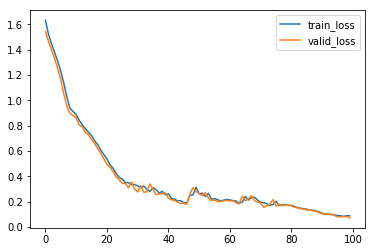

In [31]:
import matplotlib.pyplot as mplot
%matplotlib inline

mplot.plot(train_loss, label='train_loss')
mplot.plot(valid_loss, label='valid_loss')
mplot.legend()
mplot.show()

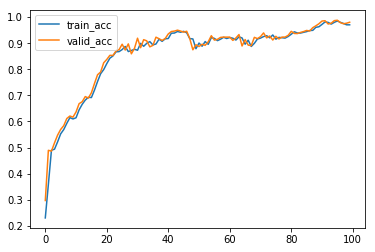

In [32]:
# import matplotlib.pyplot as mplot
mplot.plot(train_acc, label='train_acc')
mplot.plot(valid_acc, label='valid_acc')
mplot.legend()
mplot.show()

In [36]:
with tf.Session() as sess:
    # Restore the validated model
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
#     saver.restore(sess=sess, save_path='checkpoints/lstm-fnirs-har.ckpt')
    
    # Loop over batches of Test
    state = sess.run(fetches=initial_state)
    loss_batch, acc_batch = [], []
    for Xarr, Yarr in get_batches(X=Xtest, Y=Ytest, batch_size=N):

        # Feed dictionary
        feed_dict = {Xinput:Xarr, Ylabels:Yarr, initial_state:state}
        lossarr, state, accarr = sess.run(fetches=[loss, final_state, accuracy], feed_dict=feed_dict)
        loss_batch.append(lossarr)
        acc_batch.append(accarr)

    # Print info for every iter/epoch
    print("Test loss: {:6f}".format(np.mean(loss_batch)),
          "Test acc: {:.6f}".format(np.mean(acc_batch)))

INFO:tensorflow:Restoring parameters from checkpoints/lstm-imu-har.ckpt
Test loss: 0.072246 Test acc: 0.979479
